# Lab #2
#### Billy Parmenter - 7526387
## Part A

In [1]:
#imports
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

csv_path = '../../practical_labs/Lab2_dataset.csv'

In [2]:
def get_dirty_data():
  data = pd.read_csv(csv_path, header=0, names=['index','label', 'text', 'label_num'], index_col='index')
  data = data.sort_index()
  return data

In [3]:
def clean_text(text): 
  tokens = word_tokenize(text)
  
  tokens = [w.lower() for w in tokens]
  
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  
  words = [word for word in stripped if word.isalpha()]
  
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  
  return " ".join(words)

In [4]:
def get_clean_data():
  data = pd.read_csv(csv_path, header=0, names=['index','label', 'text', 'label_num'], index_col='index')
  data = data.sort_index()
  data['text'] = data['text'].apply(clean_text)
  return data

In [5]:
def split_data(data):
  matrix = CountVectorizer(max_features=1000)
  X = matrix.fit_transform(data['text']).toarray()
  y = data.iloc[:, 0]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [6]:
def evaluate_model(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)

  accuracy = accuracy_score(y_test, y_pred)

  sns.heatmap(cm.T, square=True, annot=True, fmt='d')
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  print(cr, "Accuracy: ", accuracy)

In [7]:
def fit_model(model, X_train, y_train):
  model.fit(X_train, y_train)
  return model

In [8]:
def classify(model, data):
  X_train, X_test, y_train, y_test = split_data(data)
  model = fit_model(model, X_train, y_train)
  y_pred = model.predict(X_test)
  evaluate_model(y_test, y_pred)

In [9]:
dirty_data = get_dirty_data()
clean_data = get_clean_data()

## Multinomial

              precision    recall  f1-score   support

         ham       0.97      0.93      0.95       718
        spam       0.86      0.93      0.89       317

    accuracy                           0.93      1035
   macro avg       0.91      0.93      0.92      1035
weighted avg       0.93      0.93      0.93      1035
 Accuracy:  0.9314009661835749


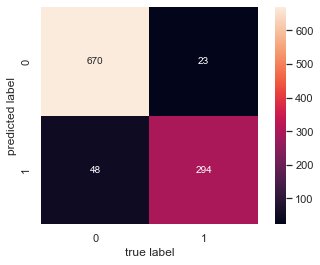

In [10]:
classify(MultinomialNB(), dirty_data)

              precision    recall  f1-score   support

         ham       0.96      0.94      0.95       718
        spam       0.87      0.91      0.89       317

    accuracy                           0.93      1035
   macro avg       0.91      0.92      0.92      1035
weighted avg       0.93      0.93      0.93      1035
 Accuracy:  0.9304347826086956


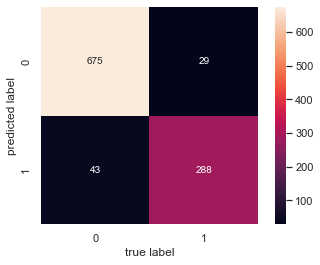

In [11]:
classify(MultinomialNB(), clean_data)

## Gaussian

              precision    recall  f1-score   support

         ham       0.99      0.94      0.96       718
        spam       0.88      0.97      0.93       317

    accuracy                           0.95      1035
   macro avg       0.93      0.96      0.94      1035
weighted avg       0.96      0.95      0.95      1035
 Accuracy:  0.9516908212560387


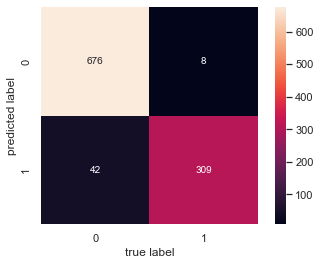

In [12]:
classify(GaussianNB(), dirty_data)

              precision    recall  f1-score   support

         ham       0.99      0.93      0.96       718
        spam       0.86      0.97      0.91       317

    accuracy                           0.94      1035
   macro avg       0.92      0.95      0.93      1035
weighted avg       0.95      0.94      0.94      1035
 Accuracy:  0.9420289855072463


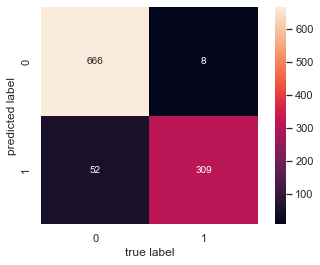

In [13]:
classify(GaussianNB(), clean_data)

### Observations
I decided to also evaluate dirty vs clean data for both Multinomial and Gaussian calssification.

Bassed on accuracy and recal I would suggest using Gaussian with, surprisingly, dirty data.